<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/Machine_Perception_with_Flowers_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Hello 🙌
In this Notebook, A Classifier is implemented in TensorFlow to classify images of [Flowers dataset](https://www.tensorflow.org/datasets/catalog/tf_flowers) from tensorflow, It contains 3670 images falling into 5 categories:


*   Daisy 💐
*   Roses 🌹
*   Dandelion 💮
*   SunFlower 🌻
*   Tulip 🌷

you can access it from here:

```gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/```



### Import Neccessary Libraries 🐾

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
print(tf.version.VERSION)

2.9.2


In [4]:
gpu_name = tf.test.gpu_device_name()
print(f'The GPU found at: {gpu_name}')

The GPU found at: 


### Get Data ⚓

In [5]:
path = 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/'

!gsutil cat gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv | head -50

gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/18089878729_907ed2c7cd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/284497199_93a01f48f6.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/4065883015_4bb6010cb7_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/roses/7420699022_60fa574524_m.jpg,roses
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/4558536575_d43a611bd4_n.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/7568630428_8cf0fc16ff_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/7064813645_f7f48fb527.jpg,tulips
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/4933229095

As tou can see, data ""TRAIN_SET"" has a path to each Image and It's type as well.

For Example:

```
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/10712722853_5632165b04.jpg,daisy
```

Has the Format:


```
PATH, Flower_Type
```




### Reading the Images 📖

In [6]:
def Image_read_decoder(filename, reshape_dims=(224, 224)):
  img = tf.io.read_file(filename) #Read the Image as a compressed String.
  img = tf.image.decode_jpeg(img, channels=3) #Decode The Compressed String to a 3-D unit8 Tensor.
  img = tf.image.convert_image_dtype(img, tf.float32) #Normalize the Tensors in to [0, 1] Range
  img = tf.image.resize(img, reshape_dims)
  return img

In [16]:
sample_img = f"{path}dandelion/18089878729_907ed2c7cd_m.jpg"
img_H, img_W, Img_C = 224, 224, 3
Image_read_decoder(sample_img, (224, 224))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [1.1648739e-03, 1.1648739e-03, 1.1648739e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[7.0027937e-04, 7.0027937e-04, 7.0027937e-04],
        [2.9074095e-04, 2.9074095e-04, 2.9074095e-04],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [4.3143428e-04, 4.3143428e-04, 4.3143428e-04],
        [0.0000000e+00

In [8]:
all_paths = tf.io.gfile.glob(f'{path}*')
path_names = tf.strings.regex_replace(all_paths, path, "")
class_names = list()
for p in path_names:
  decoded_name = p.numpy().decode('utf-8')
  if decoded_name.find('.') < 0:
    class_names.append(decoded_name)
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


#### So All the images are in 5 categories:


```
'daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'
```



### Image Visualization 👀

In [9]:
def show_img(img_path):
  img = Image_read_decoder(img_path)
  plt.imshow(img.numpy())

In [ ]:
show_img(sample_img)

Did you enjoy it? 🙂 let's Visualize more images 🥳 🥳 🥳

Look at These Lovely Daisies 💐

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
files_path = tf.io.gfile.glob(f'{path}{class_names[0]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')

Do you love dandelions? 💮

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
files_path = tf.io.gfile.glob(f'{path}{class_names[1]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')

I know The Roses 🌹 are the most favorite ones

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
files_path = tf.io.gfile.glob(f'{path}{class_names[2]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')

Do you Love SunFlower 🌻 for Itself or It's achene?

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
files_path = tf.io.gfile.glob(f'{path}{class_names[3]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')

Tulips 🌷 are my favorites

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
files_path = tf.io.gfile.glob(f'{path}{class_names[4]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')

In [10]:
def decode_csv(csv_row, H=224, W=224):
  record_defaults = ['path', 'flower']
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = Image_read_decoder(filename, [H, W])
  label = tf.argmax(tf.math.equal(class_names, label_string))
  return img, label

In [13]:
train_set_path = "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv"
eval_set_path = "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv"

train_dataset = (tf.data.TextLineDataset(train_set_path).map(decode_csv)).batch(10)

eval_dataset = (tf.data.TextLineDataset(eval_set_path).map(decode_csv)).batch(10)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_H, img_W, Img_C)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')])

In [22]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 5)                 505       
                                                                 
Total params: 15,053,405
Trainable params: 15,053,405
Non-trainable params: 0
_________________________________________________________________


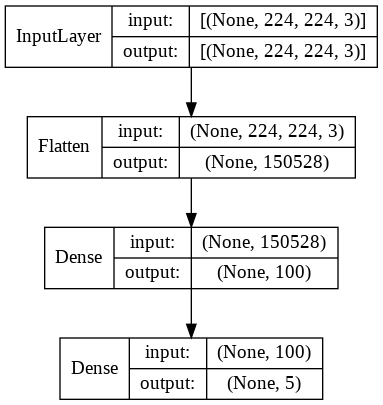

In [26]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [29]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=2)

Epoch 1/2
330/330 [==============================] - 202s 608ms/step - loss: 8.0867 - accuracy: 0.2976 - val_loss: 1.5945 - val_accuracy: 0.1919
Epoch 2/2
330/330 [==============================] - 134s 405ms/step - loss: 1.5438 - accuracy: 0.2885 - val_loss: 1.5349 - val_accuracy: 0.2892


In [37]:
def training_plot(history):
  metrics = ['loss', 'accuracy']
  f, ax = plt.subplots(1, len(metrics), figsize=(15, 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric])
    ax[idx].set_xlabel('Epochs')
    ax[idx].set_ylabel(metric, fontweight='bold', fontsize=20)
    ax[idx].plot(history.history[f'val_{metric}'], ls='dashed')
    ax[idx].legend([metric, f'val_{metric}'], fontsize=20)

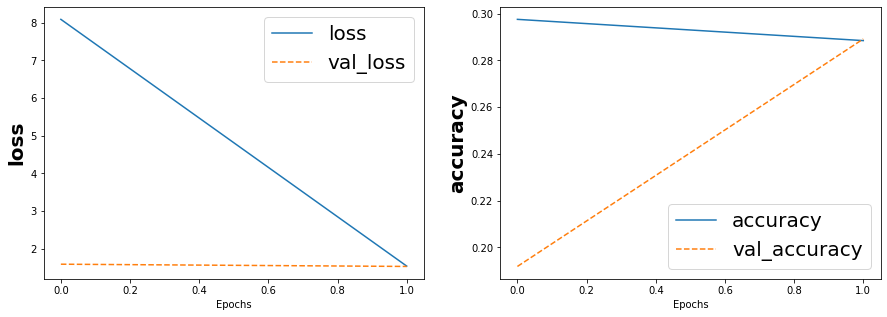

In [38]:
training_plot(history)